In [2]:
# Importing libraries:

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import string

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jyotibhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jyotibhandari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import tensorflow as tf

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<AxesSubplot:xlabel='label', ylabel='count'>

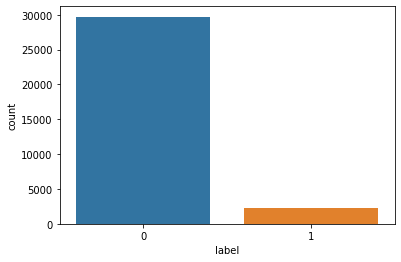

In [5]:
sns.countplot('label',data=df_train)

In [6]:
print("Shape of Train set:", df_train.shape)
print("Shape of Test set:", df_test.shape)

Shape of Train set: (31962, 3)
Shape of Test set: (17197, 2)


In [7]:
df_train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
df_train.drop_duplicates(subset=['tweet'], keep='last', inplace=True)
df_train.reset_index(inplace=True)
print("Shape of Train set after removing duplicates:", df_train.shape)

Shape of Train set after removing duplicates: (29530, 4)


In [9]:
df_offensive =pd.read_csv("labeled_data.csv")

In [10]:
df_offensive

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [11]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [12]:
df_offensive['class'].unique()

array([2, 1, 0])

In [13]:
df_offensive[df_offensive['class']==0]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
85,85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...,...,...,...,...,...
24576,25084,3,2,1,0,0,this guy is the biggest faggot omfg
24685,25197,3,2,1,0,0,which one of these names is more offensive kik...
24751,25264,3,2,1,0,0,you a pussy ass nigga and I know it nigga.
24776,25289,3,3,0,0,0,you're all niggers


In [14]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [15]:
df_offensive['class'].unique()

array([2, 1])

In [16]:
df_offensive["class"].replace({2: 0}, inplace=True)

In [17]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [18]:
df_offensive

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<AxesSubplot:xlabel='class', ylabel='count'>

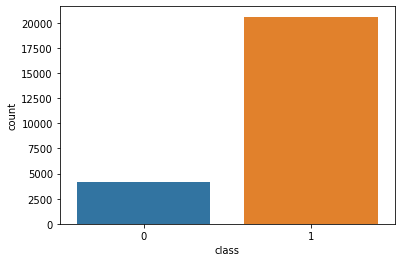

In [19]:
sns.countplot('class',data=df_offensive)

In [20]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [21]:
df_train_final = pd.concat([df_train,df_offensive])

In [22]:
df_train_final

,index,id,label,tweet
0,0.0,1.0,0,@user when a father is dysfunctional and is s...
1,1.0,2.0,0,@user @user thanks for #lyft credit i can't us...
2,2.0,3.0,0,bihday your majesty
3,4.0,5.0,0,factsguide: society now #motivation
4,5.0,6.0,0,[2/2] huge fan fare and big talking before the...
...,...,...,...,...
24778,NaN,NaN,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,NaN,NaN,0,"you've gone and broke the wrong heart baby, an..."
24780,NaN,NaN,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,NaN,NaN,1,youu got wild bitches tellin you lies


In [24]:
df_train_final

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,factsguide: society now #motivation
4,0,[2/2] huge fan fare and big talking before the...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<AxesSubplot:xlabel='label', ylabel='count'>

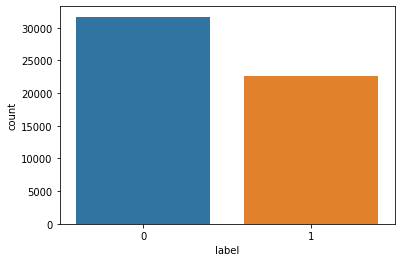

In [25]:
sns.countplot('label',data=df_train_final)

In [26]:
stop_word = stopwords.words('english')
stm = nltk.SnowballStemmer("english")

def text_cleaner(input_text):
    input_text = re.sub(r'@[A-Za-z0-9_]+','',str(input_text))    # Removing @mentions
    input_text = re.sub(r'#','',str(input_text))                 # Removing #tag symbol
    input_text = re.sub(r'RT[\s]+',' ',input_text)          # Remvoing RT
    input_text = re.sub(r'\n','',input_text) 
    input_text = re.sub(r',','',input_text) 
    input_text = re.sub(r'.[.]+','',input_text) 
    input_text = re.sub(r'\w+:\/\/\S+','',input_text) 
    input_text = re.sub(r'https?:\/\/\S+','',input_text)    # Removing hyperlinks
    input_text = re.sub(r'/',' ',input_text)
    input_text = re.sub(r'-',' ',input_text)
    input_text = re.sub(r'_',' ',input_text)
    input_text = re.sub(r'!','',input_text)
    input_text = re.sub(r':',' ',input_text)
    input_text = re.sub(r'$','',input_text)
    input_text = re.sub(r'%','',input_text)
    input_text = re.sub(r'^','',input_text)
    input_text = re.sub(r'&','',input_text)
    input_text = re.sub(r'=',' ',input_text)
    input_text = re.sub(r' +',' ',input_text) 
    input_text = re.sub('\[.*?\]', '', input_text)
    input_text = re.sub('https?://\S+|www\.\S+', '', input_text)
    input_text = re.sub('<.*?>+', '', input_text)
    input_text = re.sub('[%s]' % re.escape(string.punctuation), '', input_text)
    input_text = re.sub('\n', '', input_text)
    input_text = re.sub('[0-9]+', '', input_text) # removing numbers
    input_text = str(input_text).lower() # converting to lowercase 
    input_text = str(input_text).strip()  # Removing all the leading and trailing whitespaces present in the input data 
    input_text = [word for word in input_text.split(' ') if word not in stop_word]
    input_text=" ".join(input_text)
    input_text = [stm.stem(word) for word in input_text.split(' ')]
    input_text=" ".join(input_text)
    return input_text

In [27]:
def emoji_cleaner(input_text):
    return input_text.encode('ascii', 'ignore').decode('ascii')

In [28]:
df_train_final['tweet']=df_train_final['tweet'].apply(text_cleaner)


In [29]:
df_train_final

,label,tweet
0,0,father dysfunct selfish drag kid dysfunctio run
1,0,thank lyft credit cant use caus dont offer whe...
2,0,bihday majesti
3,0,factsguid societi motiv
4,0,huge fan fare big talk leav chao pay disput ge...
...,...,...
24778,1,yous muthafin lie right tl trash mine bibl s...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [30]:
df_test['tweet']=df_test['tweet'].apply(text_cleaner)
df_test['tweet']=df_test['tweet'].apply(emoji_cleaner)

In [31]:
df_test

,id,tweet
0,31963,studiolif aislif requir passion dedic willpow ...
1,31964,white supremacist want everyon see new birds ...
2,31965,safe way heal acn altwaystoh healthi heal
3,31966,hp curs child book reserv alreadi yes harrypo...
4,31967,rd bihday amaz hilari nephew eli ahmir uncl da...
...,...,...
17192,49155,thought factori left right polaris trump usele...
17193,49156,feel like mermaid hairflip neverreadi formal ...
17194,49157,hillari campaign today ohioomg amp use word li...
17195,49158,happi work confer right mindset lead cultur de...


In [63]:
X = df_train_final['tweet'].astype(str)  # Converting to string, because vectorizer does'nt accept list.
y = df_train_final['label'].astype(str)  # Converting to string, because vectorizer does'nt accept list.
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.8, random_state = 3) 
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54313 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   54313 non-null  int64 
 1   tweet   54313 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [64]:
df_train_final.dtypes

label     int64
tweet    object
dtype: object

In [65]:
# Extracting features using TF-IDF (1,2) - unigrams and bigrams
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  252559


In [66]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [67]:
model1= MultinomialNB().fit(X_train, y_train)
prediction1=model1.predict(X_test)
print(confusion_matrix(y_test,prediction1))
print (metrics.classification_report(y_test, prediction1))

[[6028  351]
 [ 525 3959]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6379
           1       0.92      0.88      0.90      4484

    accuracy                           0.92     10863
   macro avg       0.92      0.91      0.92     10863
weighted avg       0.92      0.92      0.92     10863



In [36]:
model2= SVC(C=1000, gamma= 0.001, kernel='rbf').fit(X_train, y_train)
prediction2=model2.predict(X_test)
print(confusion_matrix(y_test,prediction2))
print (metrics.classification_report(y_test, prediction2))

[[6114  265]
 [ 285 4199]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6379
           1       0.94      0.94      0.94      4484

    accuracy                           0.95     10863
   macro avg       0.95      0.95      0.95     10863
weighted avg       0.95      0.95      0.95     10863



In [37]:
model3= LogisticRegression(solver = 'lbfgs', multi_class = 'auto', C= 100).fit(X_train, y_train)
prediction3=model3.predict(X_test)
print(confusion_matrix(y_test,prediction3))
print (metrics.classification_report(y_test, prediction3))

[[6099  280]
 [ 304 4180]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6379
           1       0.94      0.93      0.93      4484

    accuracy                           0.95     10863
   macro avg       0.94      0.94      0.94     10863
weighted avg       0.95      0.95      0.95     10863



In [38]:
model4= RandomForestClassifier(max_depth=800, min_samples_split=5).fit(X_train, y_train)
prediction4=model4.predict(X_test)
print(confusion_matrix(y_test,prediction4))
print (metrics.classification_report(y_test, prediction4))

[[6032  347]
 [ 374 4110]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6379
           1       0.92      0.92      0.92      4484

    accuracy                           0.93     10863
   macro avg       0.93      0.93      0.93     10863
weighted avg       0.93      0.93      0.93     10863



In [39]:
model5= DecisionTreeClassifier(max_depth=800, min_samples_split=5).fit(X_train, y_train)
prediction5=model5.predict(X_test)
print(confusion_matrix(y_test,prediction5))
print (metrics.classification_report(y_test, prediction5))

[[5936  443]
 [ 346 4138]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6379
           1       0.90      0.92      0.91      4484

    accuracy                           0.93     10863
   macro avg       0.92      0.93      0.93     10863
weighted avg       0.93      0.93      0.93     10863



In [42]:

from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential



In [90]:
X_1 = df_train_final['tweet'] 
y_1 = df_train_final['label']  
xtrain, xtest, ytrain, ytest =  train_test_split(X_1, y_1, train_size = 0.8, random_state = 3) 
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54313 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   54313 non-null  int64 
 1   tweet   54313 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [91]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(xtrain)
sequences = tokenizer.texts_to_sequences(xtrain)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tokenizer.texts_to_sequences(xtest)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [93]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 300, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [94]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history=model.fit(sequences_matrix,ytrain,batch_size=1024,epochs=10,
          validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10


2022-04-28 15:01:36.390617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.7772  

2022-04-28 20:21:03.032908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 19206s 570s/step - loss: 0.5004 - accuracy: 0.7772 - val_loss: 0.3240 - val_accuracy: 0.8998
Epoch 2/10
28/34 [=======================>......] - ETA: 42:38 - loss: 0.2410 - accuracy: 0.9211

In [53]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
lstm_prediction=model2.predict(test_sequences_matrix)

ValueError: X has 300 features, but SVC is expecting 252559 features as input.

In [41]:
def test_sentence(sentence):
    s = encode_sentence(sentence, embeddings)
    s = s.reshape((1,s.shape[0],s.shape[1]))
    prediction = model2.predict(s)[0][0]
    if prediction >= 0.5:
        print("It's Abusive!")
    else:
        print("It's safe!")
    print(f"Sigmoid: {prediction}")

In [ ]:
import tensorflow as tf

In [42]:
test_sentence("""I hate you. You should die.""")
test_sentence("""I don't like you.""")

NameError: name 'encode_sentence' is not defined

In [79]:
res=[]
for prediction in prediction4:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

array(['0', '1', '0', ..., '1', '0', '1'], dtype=object)

In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
model.save("hate&abusive_model.h5")

In [80]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

NameError: name 'tokenizer' is not defined

In [61]:
filename = 'finalized_model.sav'
pickle.dump(model2, open(filename, 'wb'))

In [68]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.949369419129154


In [78]:
test = 'I love my country'
test=[text_cleaner(test)]
print(test)

['love countri']


In [79]:
test_vect = vectoriser.transform(test)
pred = loaded_model.predict(test_vect)
print("pred", pred)


pred ['0']


In [85]:

# Configs


EMBEDDING_DIM = 50
SENTENCE_LENGTH = 256
GLOVE_FILE = f'GLOVE_FILE/glove.twitter.27B.{EMBEDDING_DIM}d.txt'


In [86]:
%matplotlib inline

import pandas as pd
import numpy as np

In [87]:
embeddings = {}

with open(GLOVE_FILE, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        w = values[0]
        vectors = np.asarray(values[1:], dtype='float32')
        embeddings[w] = vectors

In [88]:
df_train_final

,label,tweet
0,0,father dysfunct selfish drag kid dysfunctio run
1,0,thank lyft credit cant use caus dont offer whe...
2,0,bihday majesti
3,0,factsguid societi motiv
4,0,huge fan fare big talk leav chao pay disput ge...
...,...,...
24778,1,yous muthafin lie right tl trash mine bibl s...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [89]:
import string
WARN = True
def encode_sentence(sentence, embeddings, sentence_length=SENTENCE_LENGTH):
    encoded_sentence = []
    words = list(map(lambda w: normalize_word(w), sentence.split(' ')))
    for word in words:
        if word == '':
            continue
        if len(encoded_sentence) >= sentence_length:
            break
        if word in embeddings:
            word_embedding = embeddings[word]
        else:
            word_embedding = average_vec
#             continue
    
        encoded_sentence.append(word_embedding)
        
    # Zero Pad embeddings to sentence_length for LSTM batch training
    while len(encoded_sentence) < sentence_length:
        encoded_sentence.append(np.zeros((EMBEDDING_DIM)))
    return np.array(encoded_sentence)